# 허깅페이스를 활용한 BERT/GPT 모델 사용

허깅페이스(Hugging Face)는 자연어 처리(NLP) 분야에서 매우 널리 사용되는 오픈소스 라이브러리와 커뮤니티를 제공하는 플랫폼으로, 모델 공유 HUB, 데이터셋 공유 HUB, 라이브러리(Transformers, Datasets 등)를 통해 손쉽게 NLP 모델들을 학습, 배포하고 활용할 수 있도록 돕습니다.

- **허깅페이스 라이브러리**

    * Transformers: 다양한 사전학습(Pre-trained) 모델(BERT, GPT-2, RoBERTa, DistilBERT 등)을 제공하며, 토큰화(Tokenization), 모델 학습, 추론 등 NLP 파이프라인 전반을 간편하게 구현가능

    * Datasets: 대규모 NLP 데이터셋을 쉽고 효율적으로 로드하고 전처리하기 위한 라이브러리로 데이터셋의 다운샘플링, 병합, 변환 등의 작업을 간단하게 처리 가능

    * Tokenizers: 빠르고 효율적인 토크나이저를 제공, 병렬 처리와 다양한 토크나이징 기법(WordPiece, BPE, SentencePiece 등)을 지원

- **모델 허브(Model Hub)**

    * 허깅페이스 모델 허브에는 연구기관, 기업, 개인 등이 공개한 다양한 사전학습 모델이 업로드되는 온라인 공간

    * 원하는 모델을 ‘다운로드’하거나, ‘from_pretrained’(Transformers API)을 통해 바로 코드에 연동 가능

    * 해당 모델의 라이선스, 사용 조건, 성능 지표 등을 확인하여 목적과 요구사항에 맞는 모델을 선택

- **데이터셋 허브(Datasets)**

    * NLP 과제(기계 번역, 감정 분석, 질의응답 등)별로 이미 잘 정리된 데이터셋을 쉽게 찾고 다운로드할 수 있는 온라인 공간

    * Datasets 라이브러리와 함께 사용하면, 데이터셋의 전처리(필터링, 매핑, 분할 등)와 캐싱 기능을 통해 반복 작업 시간을 단축하고 쉽게 데이터를 활용 가능

In [1]:
!pip install transformers

### 허깅페이스 토큰 생성

허깅페이스의 특정 모델은 라이센스로인해 인증 과정이 필요할 수 있습니다.

따라서 먼저 허깅페이스에 회원가입을 하고 [프로필](https://huggingface.co/settings) 정보에서 [Access Tokens](https://huggingface.co/settings/tokens) 메뉴에 접속하여 새로운 토큰을 생성합니다.

In [ ]:
from huggingface_hub import login



/home/jayden86/miniconda3/envs/jayden_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### 허깅페이스의 모델 객체
허깅페이스는 모델의 아키텍처에 따라 통일된 모델 객체를 만들어 놓고 허브에 올라온 모델 이름을 통해 쉽게 학습된 모델을 가져 올 수 있습니다.

- `AutoModel`: 주로 BERT 계열처럼 마스킹 기반 모델(Encoder)을 불러올 때 사용하는 객체

- `AutoModelForSeq2SeqLM`: T5, mT5, BART, mBART처럼 Encoder-Decoder 구조 모델(Transformer, Seq2Seq)을 불러올 때 사용하는 객체

- `AutoModelForCausalLM`: Decoder 구조만 사용하는 GPT 계열(Casual Language Modeling) 모델 불러올 때 사용하는 객체

- `AutoModelForSequenceClassification`: 텍스트 분류가 목적일 때 BERT/Roberta 계열 모델에 분류용 헤드를 포함한 모델을 불러오는 객체

그 외 MLM 학습기반 모델 `AutoModelForMaskedLM`, 토큰 분류를 위한 `AutoModelForTokenClassification`, QnA를 위한 `AutoModelForQuestionAnswering` 등 다양한 태스크별 Auto 클래스가 존재합니다.

허깅페이스는 이러한 모델이 맞춰서 토큰화를 쉽게 할 수 있게 `AutoTokenizer` 제공 합니다.

## Transformer 형식 모델

Transformer 형식 모델은 `AutoModelForSeq2SeqLM`에서 `from_pretrained()` 함수에 모델 이름을 입력하여 쉽게 학습된 모델을 불러올 수 있습니다.

Transformer 모델을 허브에서 찾기 위해서 [Text2Text Generation](https://huggingface.co/models?pipeline_tag=text2text-generation&sort=trending) 테스크 또는 [Translation](https://huggingface.co/models?pipeline_tag=translation&sort=trending) 테스크를 찾아봅니다.

예시에서는 다국어 지원이 되는 [nllb-200-distilled-600M](https://huggingface.co/facebook/nllb-200-distilled-600M) 모델을 활용하여 기계번역을 해봅니다.


### AutoModelForSeq2SeqLM 모델 로드

In [3]:
from transformers import AutoModelForSeq2SeqLM

# 모델 이름
model_name = "facebook/nllb-200-distilled-600M"

# 모델 불러오기
model = AutoModelForSeq2SeqLM.from_pretrained(
    model_name,             # 원하는 모델
    device_map="auto"       # GPU 환경에 따라 할당 자동화
)

# 모델 구성 출력
print(model)

M2M100ForConditionalGeneration(
  (model): M2M100Model(
    (shared): M2M100ScaledWordEmbedding(256206, 1024, padding_idx=1)
    (encoder): M2M100Encoder(
      (embed_tokens): M2M100ScaledWordEmbedding(256206, 1024, padding_idx=1)
      (embed_positions): M2M100SinusoidalPositionalEmbedding()
      (layers): ModuleList(
        (0-11): 12 x M2M100EncoderLayer(
          (self_attn): M2M100Attention(
            (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (activation_fn): ReLU()
          (fc1): Linear(in_features=1024, out_features=4096, bias=True)
          (fc2): Linear(in_features=4096, out_features=1024, bias=True)
       

**위의 M2M100 번역 모델**

> 인용구 추가


구조
```
입력 → Encoder (이해) → Decoder (생성) → 번역 출력
```
3단계

**1️⃣ Encoder (입력 이해)**

```
12 x M2M100EncoderLayer

- 입력 문장 읽기
- 의미 파악
- **양방향** (전체 문장 볼 수 있음)

"안녕하세요" → [의미 벡터]
```
**2️⃣ Decoder (번역 생성)**

```
12 x M2M100DecoderLayer

**2가지 Attention:**
- **Self Attention**: 이미 생성한 단어 참조
- **Encoder Attention**: 원문 참조 ⭐

[의미 벡터] + "Hel" → "Hello"
```
**3️⃣ LM Head**


```
Linear(1024, 256206)
- 256,206개 단어 (100개 언어!)
- 다음 단어 예측

---

## 💡 동작 예시
입력: "안녕하세요"

1. Encoder (12층):
   "안녕하세요" → [의미 벡터]

2. Decoder (12층):
   [의미 벡터] → "H"
   [의미 벡터] + "H" → "He"
   [의미 벡터] + "He" → "Hel"
   [의미 벡터] + "Hel" → "Hell"
   [의미 벡터] + "Hell" → "Hello"

3. 출력: "Hello"
```


### 토크나이져 가져오기

토크나이져 또한 모델과 비슷하게 `AutoTokenizer`의 `from_pretrained()` 함수에 동일한 모델이름을 입력하여 동일한 모델의 토크나져를 가져 올 수 있습니다.

특정 모델로 로드된 `AutoTokenizer`에서 `encode()` 함수를 통해 텍스트를 인코딩된 토큰으로 만들수 있습니다.

In [4]:
from transformers import AutoTokenizer

model_name = "facebook/nllb-200-distilled-600M"

# 토크나이저 모델 (Seq2Seq 용) 불러오기
tokenizer = AutoTokenizer.from_pretrained(model_name)

# 입력 텍스트
input_text = "오늘 수업은 언어 모델 활용 수업입니다."

# 언어 설정(통합 토큰 모델에는 생략)
tokenizer.src_lang = "ko"

# 토큰화
input_ids = tokenizer.encode(input_text, return_tensors="pt")

print(input_ids)

tensor([[   353,  13208,  95313, 248430,  53026,  52904,  77760,  95313,   2444,
         248075,      2]])


### 기계번역 해보기

AutoModelForSeq2SeqLM 모델의 `generate()` 함수에 인코더의 입력 토큰을 넣고 forced_bos_token_id 인자에 디코더의 시작 토큰을 입력하면 디코더가 자귀회귀 방식으로 토큰을 예측한 결과를 반환해 줍니다.

m2m100_418M 모델의 경우 디코더의 시작 토큰은 번역 언어 코드가 되므로 토크나이져 에서 `get_lang_id()` 함수를 사용하여 번역하고자 하는 언어 토큰의 id를 가져옵니다.

출력된 결과는 토큰 번호로 이루어진 토큰 목록이므로 텍스트 변환을 위해 토크나이져의 `decode()` 함수를 활용해 줍니다.

In [5]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 타겟 언어 설정
tar_lang = tokenizer.convert_tokens_to_ids("eng_Latn")
print(tar_lang)

# 모델 입력 및 출력: 번역 결과 생성하기
# - input_ids: 번역할 문장의 토큰 ID
# - forced_bos_token_id: 출력 언어 지정(여기서는 영어: "eng_Latn")
# - early_stopping=True: 문장의 끝(EOS)이 나오면 즉시 생성 중단
generated_tokens = model.generate(input_ids.to(device),
                                  forced_bos_token_id=tar_lang,     # 영어로 번역
                                  early_stopping=True               # 끝토큰(eos)이 나오면 중단
                                  )
print(f'출력 토큰: {generated_tokens}')

generated_text = tokenizer.decode(generated_tokens[0], skip_special_tokens=False)
print(f'생성 텍스트: {generated_text}')

The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


256047
출력 토큰: tensor([[     2, 256047,  51166, 248116, 248066,  54360,    248,      9,  65445,
          14916,  11007,  54360, 248075,      2]], device='cuda:0')
생성 텍스트: </s>eng_Latn Today's class is a language model use class.</s>


## GPT 형식 모델

GPT 형식 모델은 `AutoModelForCausalLM에서`에서 `from_pretrained()` 함수에 모델 이름을 입력하여 쉽게 학습된 모델을 불러올 수 있습니다.

GPT 모델을 허브에서 찾기 위해서 주로 [Text Generation](https://huggingface.co/models?pipeline_tag=text-generation&sort=trending)테스크를 찾아봅니다.

예시에서는 Meta에서 개발한 다국어 지원이 되는 경량화된 GPT기반 모델인 Llama3 모델을 활용하여 텍스트 생성을 해봅니다.

<center><img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*h0svec4VnlBaMGdd06uILw.png" width="600"/></center>

출처: [Christopher Ibe](https://medium.com/@ccibeekeoc42/unlocking-low-resource-language-understanding-enhancing-translation-with-llama-3-fine-tuning-df8f1d04d206)

허깅페이스의 [Llama-3.2-1B](https://huggingface.co/meta-llama/Llama-3.2-1B)
 모델을 사용하기 위해선 라이센스가 필요하기 때문에 먼저 라이센스 사용에 동의 해주고 로그인 이후 사용해 줍니다.

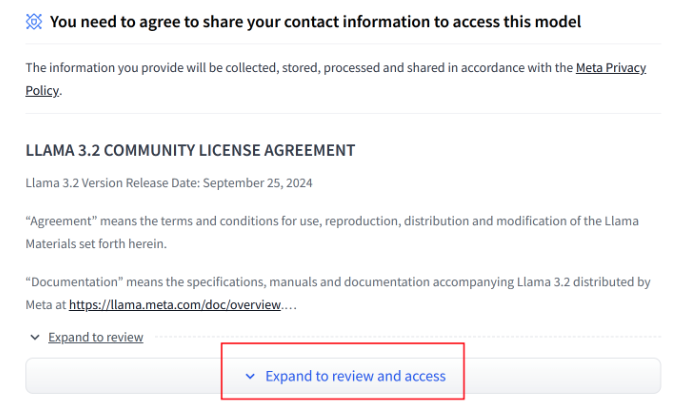

---

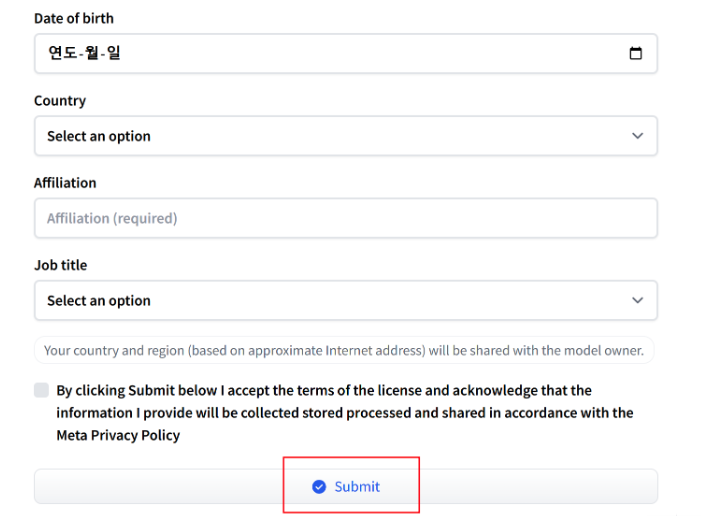


In [ ]:
from huggingface_hub import login



### AutoModelForCausalLM 모델 로드

디코더만 사용하여 캐주얼 마스크를 통해 자기회귀방식으로 텍스트를 생성하는 모델은 `AutoModelForCausalLM` 객체를 사용하여 로드해 줍니다.

In [7]:
from transformers import AutoModelForCausalLM

model_name="meta-llama/Llama-3.2-1B"

# model:
# - Llama-3.2-1B 사전학습 언어모델(LLM)을 불러온 객체
# - 텍스트 생성/요약/질문응답 등 "Causal LM(한 방향 언어모델)" 작업에 사용
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    device_map="auto"
)

model

LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(128256, 2048)
    (layers): ModuleList(
      (0-15): 16 x LlamaDecoderLayer(
        (self_attn): LlamaAttention(
          (q_proj): Linear(in_features=2048, out_features=2048, bias=False)
          (k_proj): Linear(in_features=2048, out_features=512, bias=False)
          (v_proj): Linear(in_features=2048, out_features=512, bias=False)
          (o_proj): Linear(in_features=2048, out_features=2048, bias=False)
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear(in_features=2048, out_features=8192, bias=False)
          (up_proj): Linear(in_features=2048, out_features=8192, bias=False)
          (down_proj): Linear(in_features=8192, out_features=2048, bias=False)
          (act_fn): SiLUActivation()
        )
        (input_layernorm): LlamaRMSNorm((2048,), eps=1e-05)
        (post_attention_layernorm): LlamaRMSNorm((2048,), eps=1e-05)
      )
    )
    (norm): LlamaRMSNorm((2048,), eps=1e-05)
    (ro

**위의 Llama 모델 요약**
구조
```
입력 → Embedding → 16층 → 다음 단어 예측
```
3단계

**1️⃣ Embedding**

```
Embedding(128256, 2048)
```
- 128,256개 단어
- 각각 2048차원 벡터로


**2️⃣ 16층 반복**
```
16 x LlamaDecoderLayer
```
각 층:

- Attention: 이전 단어들 참조 (미래는 못 봄)
- MLP: 2048 → 8192 → 2048 (패턴 학습)


**3️⃣ LM Head**
```
Linear(2048, 128256)

- 128,256개 단어 각각 점수
- 가장 높은 점수 = 다음 단어

---

## 💡 동작 예시

입력: "나는 AI를"
  ↓
16층 처리
  ↓
점수: "공부한다" 95% ← 선택!
     "좋아한다" 3%
     "싫어한다" 2%
  ↓
출력: "공부한다"
```


### 토큰화

다국어가 지원되는 모델은 모델마다 언어 코드를 입력해야되는 경우가 있고 입력을 안해도 되는 경우가 있습니다.  

또한 encode() 함수를 사용하지 않고 만들어진 `AutoTokenizer` 인스턴스를 함수형식으로 활용하면 입력 토큰과 어텐션 마스크가 매핑된 딕셔너리를 가져올 수 있습니다.

In [8]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(model_name)

# 모델에 넣을 프롬프트
prompt = '자연어 분석은'

# 토크나이징
tokens = tokenizer(prompt, return_tensors='pt')
tokens

{'input_ids': tensor([[128000,  26799, 101347,  32179, 109862,  34804]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]])}

### 텍스트 생성하기

디코더만 사용하는 AutoModelForCausalLM에서 인코더의 입력 없이 디코더에 들어갈 초기 토큰만 입력하여 텍스트를 생성합니다. 이때 기본적으로 어텐션 마스크가 같이 입력되어야 합니다.

토크나이져의 결과인 딕셔너리를 그대로 입력으로 사용하기 위해 `**` 를 활용할 수 있습니다.

In [9]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

input_tensor = tokens['input_ids'].to(device)
attention_mask = tokens['attention_mask'].to(device)

# 텍스트 생성
with torch.no_grad():                   # 생성 단계에서는 그래디언트 계산 비활성화 (속도 ↑, 메모리 ↓)
    # 입력 토큰과 어텐션 마스크를 나누어 입력
    outputs = model.generate(
        input_tensor,                   # 입력 토큰
        attention_mask=attention_mask,  # 어텐션 마스크: 패딩 토큰은 무시하도록 하는 마스
        max_length=128,                 # 생성할 최대 토큰(단어) 길이 제한
        no_repeat_ngram_size=2,         # 2단어 연속 중복 생성을 억제
        early_stopping=True             # 문장 끝(EOS) 토큰 나오면 즉시 멈추기
    )

# 생성된 토큰을 사람이 읽을 수 있는 문장으로 디코딩
response = tokenizer.decode(outputs[0], skip_special_tokens=True)
print(response)

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


자연어 분석은 자연어의 특징을 파악하고, 자연어가 사용하는 방법을 분석하여 자연어나 사용자의 의도를 파괴하는 것을 방지하는 일련의 과정이다. 자연의 어휘의 분석을 통하여, 어플리케이션의 이해를 돕기 위해 자연언어를 분석하는 과정이 필요하다. 이 과정을 통해 자연 언어의 사용자와 어울리기 위해서는 자연 어어텍스트 분석에 필요한 데이터를 수집하고 분석해야 한다. 이러한 분석 과정에서 가장 중요한 것은 자연론의 의미론적 분석이 되


## BERT 형식 모델

### AutoModel 모델 로드

BERT 형식 모델은 `AutoModel`에서 `from_pretrained()` 함수에 모델 이름을 입력하여 쉽게 학습된 모델을 불러올 수 있습니다.

BERT 모델을 허브에서 찾기 위해서 주로 [Fill Mask](https://huggingface.co/models?pipeline_tag=fill-mask&sort=trending)테스크를 찾아봅니다.

예시에서는 다국어 지원이 되는 [bert-base-multilingual-cased](https://huggingface.co/google-bert/bert-base-multilingual-cased) 모델을 활용하여 BERT 모델이 만든 임베딩값을 살펴봅니다.

In [10]:
from transformers import AutoTokenizer, AutoModel
import torch

model_name = "google-bert/bert-base-multilingual-cased"

model = AutoModel.from_pretrained(model_name, device_map="auto")
print(model)

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(119547, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=Fals

**위의 BERT 모델(bert-base-multilingual-cased) 구조**

```
3단계
📝 입력 텍스트
    ↓
🔢 1. Embeddings (단어를 숫자로)
    ↓
🏗️ 2. Encoder (12층 - 의미 파악)
    ↓
📊 3. Pooler (문장 요약)
```

**1️⃣ Embeddings - 단어를 숫자로 변환**
```
(word_embeddings): Embedding(119547, 768)
                              ↑       ↑
                         단어 개수  벡터 크기
```
**2️⃣ Encoder - 12층 레이어**
**각 층마다:**

① Attention (관계 파악)
```
"나는 고양이를 좋아한다"

"좋아한다"가 주목하는 단어:
- "나는" 80%
- "고양이를" 95% ← 가장 중요!
```

② Feed Forward (패턴 학습)
```
768 → 3072 (확장) → 768 (압축)
      ↑
   중요한 특징만 남김
```

**3️⃣ Pooler - 문장 하나로 요약**

- [CLS] 토큰(문장 시작)의 벡터를 가져와서
- **전체 문장의 의미** 하나로 압축

**사용 예:**
```
"이 영화 최고야!" → 긍정 (99%)
```

### 토큰화

BERT 모델의 토크나이저는 모델에 따라 2개이상의 문장으로 연결된 입력이 입력될수 있어 이를 구분하는 token_type_ids가 같이 출력됩니다.

In [11]:
model_name = "google-bert/bert-base-multilingual-cased"

# 토크나이저
tokenizer = AutoTokenizer.from_pretrained(model_name)

# 토큰화
sentence = "오늘 수업은 자연어 분석 수업인가?"
inputs = tokenizer(sentence, text_pair='아니 오늘 수업은 자연어 분석 수업이 아니다', return_tensors="pt")
inputs


{'input_ids': tensor([[   101,   9580, 118762,   9460,  26784,  10892,   9651,  25486,  12965,
           9367,  40958,   9460,  26784,  12030,  11287,    136,    102,   9519,
          25503,   9580, 118762,   9460,  26784,  10892,   9651,  25486,  12965,
           9367,  40958,   9460,  26784,  10739,   9519,  48345,    102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

> 2개 이상의 문장을 입력하고 싶을땐, text_pair 인자에 두번째 문장을 입력해줍니다.

### 문장 임베딩 출력

BERT 모델에는 BERT 토크나이져로 만든 입력 토큰, 문장 토큰, 어텐션 토큰이 구성된 딕셔너리를 `**`(keyword argumen)로 입력하여 모델의 출력을 만듭니다.


```
# 1. 토크나이저 → 딕셔너리 3개
inputs = tokenizer(text, return_tensors="pt")
# {'input_ids': ..., 'token_type_ids': ..., 'attention_mask': ...}

# 2. ** = 딕셔너리 펼치기
outputs = model(**inputs)

**inputs
= input_ids=..., token_type_ids=..., attention_mask=...
```
딕셔너리를 → 함수 인자로 변환 📦➡️




**BERT 모델의 출력**

BERT 모델의 출력결과는 입력된 모든 토큰에 대한 시퀀스 출력값인 `last_hidden_states`와 [CLS] 토큰의 출력인 `pooler_output`두가지로 출력됩니다.

```
outputs = model(**inputs)

# 1. last_hidden_state - 모든 토큰의 벡터
# 2. pooler_output - 문장 전체 벡터
```

**① last_hidden_state**
모든 단어의 최종 벡터
```
pythontext = "Hello world"
# [CLS] Hello world [SEP]

outputs.last_hidden_state.shape
# torch.Size([1, 4, 768])
#             ↑  ↑  ↑
#         배치 토큰 벡터크기

# 각 토큰별 벡터:
[CLS]  → [0.2, -0.5, ..., 0.8]  # 768개 숫자
Hello  → [0.1, 0.3, ..., -0.2]  # 768개 숫자
world  → [-0.4, 0.7, ..., 0.5]  # 768개 숫자
[SEP]  → [0.6, -0.1, ..., 0.3]  # 768개 숫자
```

**용도:**
- 개체명 인식 (NER)
- 품사 태깅
- 질의응답 (단어 위치 찾기)


**② pooler_output**
[CLS] 토큰 하나만 (문장 요약)

```
outputs.pooler_output.shape
# torch.Size([1, 768])
#             ↑   ↑
#         배치  벡터

# [CLS] 토큰의 벡터:
[0.5, -0.2, 0.8, ..., 0.3]  # 768개 숫자
```

**용도:**
- 문장 분류 (긍정/부정)
- 문장 유사도
- 감정 분석

---

**🎨 비유**
```
입력: "이 영화 최고야"
       ↓
BERT 모델 처리
       ↓
출력:

1. last_hidden_state (개별 단어 분석)
   "이" → 벡터
   "영화" → 벡터
   "최고야" → 벡터

2. pooler_output (전체 문장)
   "이 영화 최고야" → 긍정 벡터

```

In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 모델 추론
# 모델은 last_hidden_states와 pooler_output 두 값을 모두 반환하며,
# 작업 목적에 따라 필요한 것만 선택해서 사용하면 됨.
with torch.no_grad():
    outputs = model(**inputs.to(device))
    # BERT의 마지막 Transformer layer 출력 (모든 토큰의 hidden state)
    last_hidden_states = outputs.last_hidden_state
    # [CLS] 토큰을 기반으로 만든 문장 대표 벡터 (분류용)
    pooler_output = outputs.pooler_output

print("Hidden states shape:", last_hidden_states.shape)     # last_hidden_state (개별 단어 분석)
print("pooler_output shape:", pooler_output.shape)          # pooler_output (전체 문장)

Hidden states shape: torch.Size([1, 35, 768])
pooler_output shape: torch.Size([1, 768])


### 감성 분류가 적용된 BERT

분류 작업이 추가된 BERT 모델은 `AutoModelForSequenceClassification` 객체를 활용하여 불러 올 수 있습니다.

[tabularisai/multilingual-sentiment-analysis](https://huggingface.co/tabularisai/multilingual-sentiment-analysis)

In [14]:
import torch
torch.cuda.empty_cache()

In [15]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

model_name = "tabularisai/multilingual-sentiment-analysis"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name,
                                                           device_map="auto")
print(model)

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)

**위의 DistilBERT 모델**
구조
```
입력
 ↓
Embeddings (768차원)
 ↓
6층 Transformer (BERT의 절반!)
 ↓
Pre-classifier (768 → 768)
 ↓
Classifier (768 → 5)  ← 5개 클래스 분류
 ↓
출력 (긍정/부정 등)
```

| 항목 | BERT | DistilBERT |
|------|------|------------|
| 층 수 | 12층 | 6층 (절반!) |
| 속도 | 느림 | 2배 빠름 ⚡ |
| 크기 | 크다 | 40% 작음 |
| 성능 | 100% | 97% |
| 파라미터 | 1.1억 개 | 6600만 개 |
| 용도 | 높은 정확도 필요 | 빠른 응답 필요 |


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def predition_sentiment(texts):
    inputs = tokenizer( texts,
                        return_tensors="pt",    # PyTorch 텐서로
                        truncation=True,        # 512자 넘으면 자르기
                        padding = True,         # 짧으면 패딩 추가
                        max_length=512          # 최대 512 토큰
                    )
    with torch.no_grad():                                               # 학습 안 함 (속도↑)
        outputs = model(**inputs.to(device))

    probabilities = torch.nn.functional.softmax(outputs.logits, dim=-1) # 가장 높은 인덱스
    sentiment_map = {0: "Very Negative",
                     1: "Negative",
                     2: "Neutral",
                     3: "Positive",
                     4: "Very Positive"
                     }
    return [sentiment_map[p] for p in torch.argmax(probabilities, dim=-1).tolist()]

texts =['하, 오늘 수업은 너무 어렵고 힘들었다.',
        '오, 오늘 수업은 너무 재미있고 유익했다!']

for text, sentiment in zip(texts, predition_sentiment(texts)):
    print(f"Text: {text}\nSentiment: {sentiment}\n")


RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument index in method wrapper_CUDA__index_select)

: 